# Initial Exploratory Data Analysis (EDA)

In this section, we will perform an initial exploratory data analysis (EDA) on the TMDB movie dataset. This includes loading the dataset, cleaning the data, and visualizing key features to understand the distribution and relationships within the data.

In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

In [656]:
df = pd.read_csv("./data/TMDB_movie_dataset_v11.csv")
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [661]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [662]:
df['spoken_languages']

0          English, French, Japanese, Swahili
1                                     English
2                           English, Mandarin
3                            English, Spanish
4                     English, Hindi, Russian
                          ...                
1171695                              Mandarin
1171696                               English
1171697                       Basque, Spanish
1171698                               Swedish
1171699                                   NaN
Name: spoken_languages, Length: 1171700, dtype: object

## Cleaning and Extracting Relevant Features

In [665]:
df = df[['production_countries', 'popularity', "title", "vote_average", "vote_count", "release_date", "overview", "genres", "keywords", "production_companies", "poster_path", "imdb_id"]]

In [666]:
df.isna().sum()

production_countries    525858
popularity                   0
title                       13
vote_average                 0
vote_count                   0
release_date            202010
overview                242810
genres                  475846
keywords                858466
production_companies    646233
poster_path             376408
imdb_id                 560684
dtype: int64

In [667]:
df = df.dropna(subset=[col for col in df.columns if col != "imdb_id"])

In [668]:
len(df)

142606

## Visualizing rating distributions

c:\Users\Brendan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


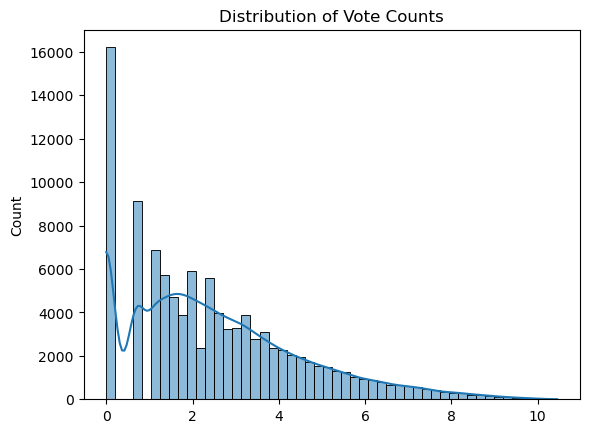

In [669]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df[df["vote_count"] > 0]
log_vote_count = np.log(df["vote_count"])
sns.histplot(log_vote_count, bins=50, kde=True)
plt.title("Distribution of Vote Counts")
plt.xlabel("")
plt.show()

c:\Users\Brendan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


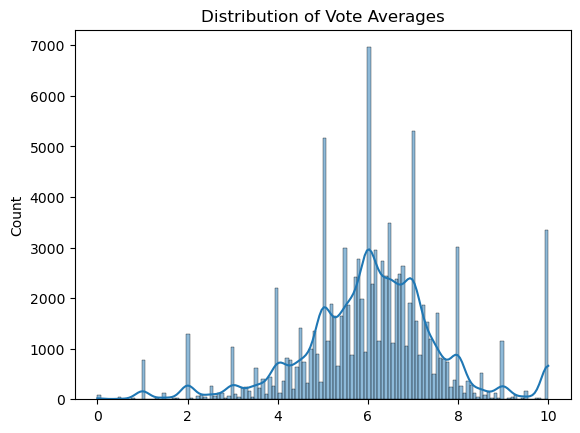

In [670]:
sns.histplot(df["vote_average"], kde=True)
plt.title("Distribution of Vote Averages")
plt.xlabel("")
plt.show()

In [671]:
df["vote_average"].describe()

count    105516.000000
mean          6.087168
std           1.555672
min           0.000000
25%           5.200000
50%           6.100000
75%           7.000000
max          10.000000
Name: vote_average, dtype: float64

In [675]:
m = df["vote_count"].quantile(0.90)

In [676]:
m

2034.0

In [678]:
df = df[df["vote_count"] >= m]
df

,production_countries,popularity,title,vote_average,vote_count,release_date,overview,genres,keywords,production_companies,poster_path,imdb_id
0,"United Kingdom, United States of America",83.952,Inception,8.364,34495,2010-07-15,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...","Legendary Pictures, Syncopy, Warner Bros. Pict...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,tt1375666
1,"United Kingdom, United States of America",140.241,Interstellar,8.417,32571,2014-11-05,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...","Legendary Pictures, Syncopy, Lynda Obst Produc...",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,tt0816692
2,"United Kingdom, United States of America",130.643,The Dark Knight,8.512,30619,2008-07-16,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...","DC Comics, Legendary Pictures, Syncopy, Isobel...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg,tt0468569
3,"United States of America, United Kingdom",79.932,Avatar,7.573,29815,2009-12-15,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...","Dune Entertainment, Lightstorm Entertainment, ...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,tt0499549
4,United States of America,98.082,The Avengers,7.710,29166,2012-04-25,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Marvel Studios,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,tt0848228
...,...,...,...,...,...,...,...,...,...,...,...,...
2127,United States of America,14.476,Just Mercy,7.903,2036,2019-12-25,The powerful true story of Harvard-educated la...,"Drama, Crime, History","judge, innocence, based on true story, lawyer,...","Netter Productions, Outlier Society Production...",/4YJNp1cquIkX8JxFwkKNEFQ9tgr.jpg,tt4916630
2128,"France, United Kingdom, United States of America",15.735,Trance,6.630,2035,2013-03-27,A violent gang enlists the help of a hypnother...,"Thriller, Crime, Drama, Mystery","amnesia, heist, art thief, hypnotism, duringcr...","Pathé, Decibel Films, Film4 Productions, Cloud...",/3MVYuyVknNA9yC0Gy6z3zDAiWfX.jpg,tt1924429
2129,"China, United States of America",1567.273,Meg 2: The Trench,6.912,2034,2023-08-02,An exploratory dive into the deepest depths of...,"Action, Science Fiction, Horror","based on novel or book, sequel, shark, kaiju, ...","Apelles Entertainment, Warner Bros. Pictures, ...",/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,tt9224104
2130,United States of America,40.707,Spy Kids 3-D: Game Over,5.100,2034,2003-07-25,Carmen's caught in a virtual reality game desi...,"Action, Adventure, Comedy, Family, Science Fic...","mission, artificial intelligence (a.i.), video...",Dimension Films,/oP53PyexPlQd1xDt8kkvX5LdQdT.jpg,tt0338459


## Feature Engineering

Using IMDB"s weighted rating we can get a more statistically significant value to quantify each movie"s ratings.

In [679]:
C = df["vote_average"].mean()
def weighted_score(df):
    v = df["vote_count"]
    R = df["vote_average"]

    return ((v/(v+m)) * R) + ((m/(v+m)) * C)

In [680]:
df["weighted_rating"] = df.apply(weighted_score, axis=1)
df["weighted_rating"]

0       8.284905
1       8.330393
2       8.414297
3       7.532799
4       7.660032
          ...   
2127    7.423497
2128    6.786723
2129    6.927762
2130    6.021762
2131    6.455262
Name: weighted_rating, Length: 2128, dtype: float64

In [681]:
df = df.sort_values(by="weighted_rating", ascending=False)
df['weighted_rating'].head()
df = df.drop_duplicates(subset=['title'], keep="first")

In [682]:
df = df.drop(columns=["vote_count"])

In [683]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_year"] = df["release_date"].dt.year
df["release_year"]
df = df.drop(columns=["release_date"])

In [684]:
def bin_year(year):
  if year < 1950:
    return "pre-1950"
  elif year < 1960:
    return "1950s"
  elif year < 1970:
    return "1960s"
  elif year < 1980:
    return "1970s"
  elif year < 1990:
    return "1980s"
  elif year < 2000:
    return "1990s"
  elif year < 2010:
    return "2000s"
  elif year < 2020:
    return "2010s"
  else:
    return "2020s"
  
df["release_year"] = df["release_year"].apply(bin_year)

## Word2Vec implementation for Genres and Keywords
In this project, we use **Word2Vec embeddings** to represent movie genres and keywords as dense vectors. Unlike one-hot encoding, which creates sparse high-dimensional vectors, Word2Vec captures **semantic relationships** between words. This allows the model to learn meaningful connections between movies based on their metadata.

In [685]:
from gensim.models import Word2Vec
import gensim
import re


In [686]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brendan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brendan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [687]:
df['overview'] = df['overview'].apply(preprocess_text)

In [688]:
df['genres'] = df['genres'].apply(preprocess_text)

In [689]:
df['keywords'] = df['keywords'].apply(preprocess_text)

In [690]:
df['production_companies'] = df['production_companies'].str.lower().str.split(", ")
df['production_companies']

14                            [castle rock entertainment]
53                        [paramount, alfran productions]
2       [dc comics, legendary pictures, syncopy, isobe...
9                   [miramax, a band apart, jersey films]
119                                [amblin entertainment]
                              ...                        
519     [dc entertainment, de line pictures, warner br...
1454    [village roadshow pictures, di novi pictures, ...
1199    [paramount, nickelodeon movies, blinding edge ...
1174                [vertigo entertainment, lin pictures]
912     [dc comics, polygram filmed entertainment, war...
Name: production_companies, Length: 2088, dtype: object

In [691]:
df['production_countries'] = df['production_countries'].str.lower().str.split(", ")
df['production_countries']

14                      [united states of america]
53                      [united states of america]
2       [united kingdom, united states of america]
9                       [united states of america]
119                     [united states of america]
                           ...                    
519                     [united states of america]
1454                    [united states of america]
1199                    [united states of america]
1174                    [united states of america]
912                     [united states of america]
Name: production_countries, Length: 2088, dtype: object

In [797]:
genres = df["genres"].tolist()
keywords = df["keywords"].tolist()
production_countries = df['production_companies'].tolist()
production_companies = df['production_countries'].tolist()
GENRE_VECTOR_SIZE = 10
KEYWORDS_VECTOR_SIZE = 10
PRODUCTION_COMP_VECTOR_SIZE = 5
PRODUCTION_COUNT_VECTOR_SIZE = 5
w2v_genre = Word2Vec(sentences=genres, 
                     vector_size=GENRE_VECTOR_SIZE,
                     window=5,
                     min_count=100,
                     workers=4,
                     sg=1)

w2v_keywords = Word2Vec(sentences=keywords,
                        vector_size=KEYWORDS_VECTOR_SIZE,
                        window=5,
                        min_count=50,
                        workers=4,
                        sg=1)
w2v_production_comp = Word2Vec(sentences=production_countries,
                          vector_size=PRODUCTION_COMP_VECTOR_SIZE,
                          window=5,
                          min_count=5,
                          workers=4,
                          sg=1)
w2v_production_count = Word2Vec(sentences=production_companies,
                       vector_size=PRODUCTION_COUNT_VECTOR_SIZE,
                       window=5,
                       min_count=100,
                       workers=4,
                       sg=1)

In [798]:
def get_average_embedding(words, model, vector_size):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

In [799]:
df["genre_embedding"] = df["genres"].apply(lambda words: get_average_embedding(words, w2v_genre, GENRE_VECTOR_SIZE))
df["keywords_embedding"] = df["keywords"].apply(lambda words: get_average_embedding(words, w2v_keywords, KEYWORDS_VECTOR_SIZE))
df['production_comp_embedding'] = df['production_companies'].apply(lambda words: get_average_embedding(words, w2v_production_comp, PRODUCTION_COMP_VECTOR_SIZE))
df['production_count_embedding'] = df['production_countries'].apply(lambda words: get_average_embedding(words, w2v_production_count, PRODUCTION_COUNT_VECTOR_SIZE))


In [800]:
ratings_scaler = StandardScaler()
pop_scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)

ratings_scaled = ratings_scaler.fit_transform(df[["weighted_rating"]])
genre_embed = np.array(df["genre_embedding"].tolist())
keyword_embed = np.array(df["keywords_embedding"].tolist())
production_comp_embed = np.array(df['production_comp_embedding'].tolist())
production_count_embed = np.array(df['production_count_embedding'].tolist())
year_encoded = ohe.fit_transform(df[["release_year"]])
popularity_scaled = pop_scaler.fit_transform(df[['popularity']])

In [801]:
features = np.hstack([keyword_embed, genre_embed, production_comp_embed, production_count_embed])

In [802]:
model = NearestNeighbors(n_neighbors=7, metric="cosine")
model.fit(features)

NearestNeighbors(metric='cosine', n_neighbors=7)

In [832]:
title_to_index = {title: idx for idx, title in enumerate(df["title"])}
idx = title_to_index['Pride & Prejudice']

In [833]:
distances, indices = model.kneighbors([features[idx]])
recommended = df.iloc[indices[0][1:]]["title"].tolist()
recommended

['Atonement',
 'The Reader',
 'About a Boy',
 'Anna Karenina',
 'O Brother, Where Art Thou?',
 'A Simple Favor']

In [821]:
df = df.reset_index()

In [822]:
df[["title", "poster_path", "imdb_id", "vote_average"]].to_csv("./data/indexed_movies.csv")

In [823]:
np.save("./data/features.npy", features)

In [824]:
df.drop(columns=["title", "poster_path", "imdb_id"]).to_csv("./data/movies_metadata.csv")

In [825]:
import pickle
with open("./data/model.pkl", "wb") as file:
  pickle.dump(model, file)


In [611]:
import pickle
with open("./data/model.pkl", "rb") as file:
  model = pickle.load(file)

In [612]:
features = np.load("./data/features.npy")

In [613]:
df = pd.read_csv("./data/indexed_movies.csv")